In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import mglearn
import matplotlib.pyplot as plt

# Manifold Learning with t-SNE
- manifold learning algorithms allow for more complex mappings than applying a rotation and dropping directions as done in an algorithm such as PCA
- often provides better visualizations when needing to maintain such complex mappings
- rarely used to generate more than two new features, and are primarily used for visualizations
- t-SNE, and others, will compute a new representation but do not allow for transformation of new data
- Impact is found in exploratory data analysis
- t-SNE finds two-dimensional representation of the data the preserves the distances between points as best as possible
- t-SNE prioritizes the preservation of points close to each other rather than the distance from far-away points.


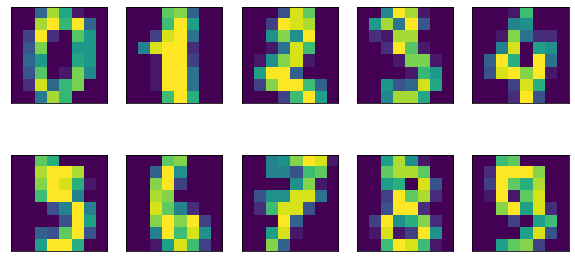

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5),
    subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


Text(0, 0.5, 'Second principal component')

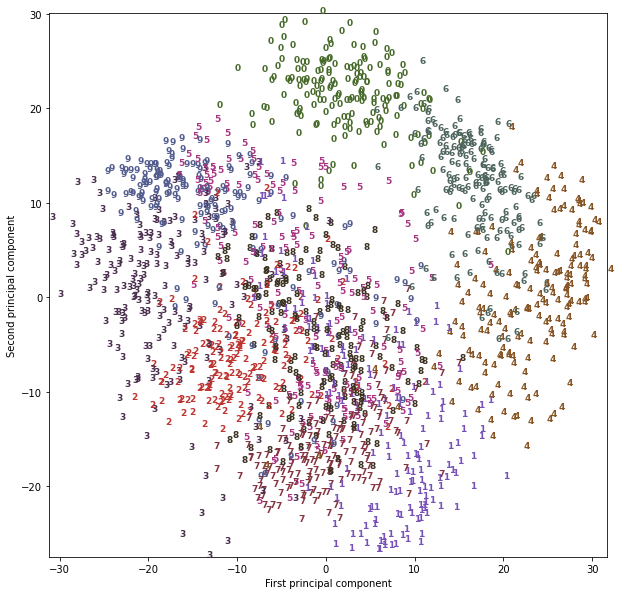

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components

digits_pca = pca.transform(digits.data)
colors = ['#476A2A', "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", '#535D8E']

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
        color=colors[digits.target[i]],
        fontdict={'weight': 'bold', 'size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")



In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)


Text(0, 0.5, 't-SNE feature 1')

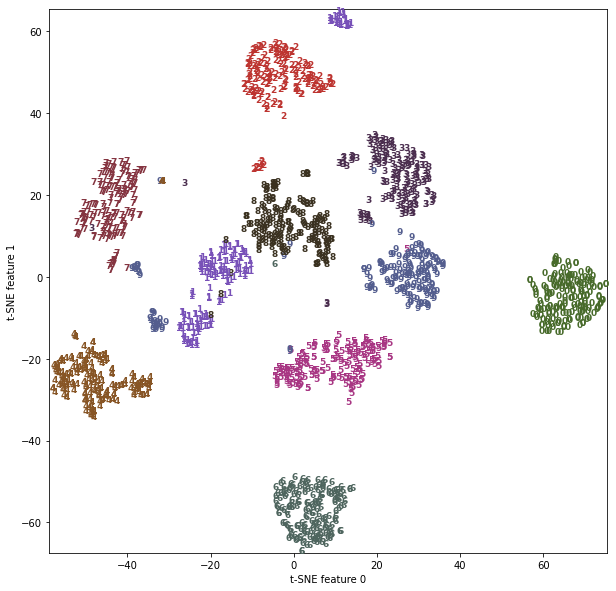

In [11]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:,0].max() +1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

- parameters *perplexity* and *early_exaggeration* may be tuned, but the effects are usually minor